# Projeto Final

In [690]:
#Importação das bibliotecas
from utils import *
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from keras.models import Sequential # type: ignore
from keras.layers import Dense, Dropout # type: ignore
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import pandas as pd
import psycopg2
import warnings
import numpy as np
warnings.filterwarnings("ignore")

In [691]:
#conexão
conn = psycopg2.connect(
    host="localhost",
    database="credito",
    user="postgres",
    password="1234",
    port=5432,
)

In [692]:
#cria um cursor
cursor = conn.cursor()
#define consulta
query = 'SELECT * FROM CREDITO_CATEGORICO;'
#executa
df_credito = pd.read_sql(query, conn)
df_credito.head(10)

,IdCredito,Duracao,HistoricoCredito,Proposito,Valor,Investimentos,Emprego,TempoParcelamento,EstadoCivil,Fiador,ResidenciaDesde,Idade,OutrosFinanciamentos,Habitacao,EmprestimoExistente,Profissao,Dependentes,SocioEmpresa,Estrangeiro,Inadimplente
0,2,48,existentes/pagos,reforma,5951,<100\\n,1<=X<4,2,Solteiro,nao,2.0,22,nenhum,propria,1,qualificado,1,nao,nao,nao
1,3,12,Critico-outros creditos,educacao,2096,<100\\n,4<=X<7,2,Viuvo,nao,3.0,49,nenhum,propria,1,nao qualificado,2,nao,nao,sim
2,4,42,existentes/pagos,moveis,7882,<100\\n,4<=X<7,2,Viuvo,sim,4.0,45,nenhum,de graca,1,qualificado,2,nao,nao,sim
3,5,24,Atrasos anteriores,veiculo novo,4870,<100\\n,1<=X<4,3,Viuvo,nao,4.0,53,nenhum,de graca,2,qualificado,2,nao,nao,nao
4,6,36,existentes/pagos,educacao,9055,Desconhecido\\n,1<=X<4,2,Viuvo,nao,4.0,35,nenhum,de graca,1,nao qualificado,2,sim,nao,sim
5,7,24,existentes/pagos,moveis,2835,500<=X<1000,>=7,3,Viuvo,nao,4.0,53,nenhum,propria,1,qualificado,1,nao,nao,sim
6,9,12,existentes/pagos,reforma,3059,>=1000,4<=X<7,2,Casado,nao,4.0,61,nenhum,propria,1,nao qualificado,1,nao,nao,sim
7,11,12,existentes/pagos,veiculo novo,1295,<100\\n,<1,3,Solteiro,nao,1.0,25,nenhum,alugada,1,qualificado,1,nao,nao,nao
8,13,12,existentes/pagos,reforma,1567,<100\\n,1<=X<4,1,Solteiro,nao,1.0,22,nenhum,propria,1,qualificado,1,sim,nao,sim
9,14,24,Critico-outros creditos,veiculo novo,1199,<100\\n,>=7,4,Viuvo,nao,4.0,60,nenhum,propria,2,nao qualificado,1,nao,nao,nao


Análise Exploratoria dos Dados

Dados Categoricos

In [693]:
# Agrupado por HistoricoCredito
groupby_HistoricoCredito = df_credito.groupby(df_credito['HistoricoCredito']).size()
print(groupby_HistoricoCredito)

HistoricoCredito
Atrasos anteriores           86
Critico-outros creditos     289
existentes/pagos            526
sem creditos/todos pagos     40
todos pagos                  48
dtype: int64


In [694]:
# Agrupado por Proposito
groupby_Proposito = df_credito.groupby([df_credito['Proposito']]).size()
groupby_Proposito

Proposito
abrir negocio     97
educacao          50
moveis           181
outros            12
qualificacao       9
quitar divida     12
reforma          280
reforma casa      22
veiculo novo     234
veiculo usado    103
dtype: int64

In [695]:
# Agrupado por Investimentos
groupby_Investimentos = df_credito.groupby(['Investimentos']).size()
groupby_Investimentos

Investimentos
100<=X<500         103
500<=X<1000         63
<100\\n            603
>=1000              48
Desconhecido\\n    183
dtype: int64

In [696]:
# Agrupado por Emprego
groupby_Emprego = df_credito.groupby(df_credito['Emprego']).size()
groupby_Emprego

Emprego
1<=X<4          338
4<=X<7          172
<1              171
>=7             247
Desempregado     62
dtype: int64

In [697]:
# Agrupado por EstadoCivil
groupby_EstadoCivil = df_credito.groupby([df_credito['EstadoCivil']]).size()
groupby_EstadoCivil

EstadoCivil
Casado         50
Divorciado     92
Solteiro      310
Viuvo         548
dtype: int64

In [698]:
# Agrupado por Fiador
groupby_Fiador = df_credito.groupby([df_credito['Fiador']]).size()
groupby_Fiador

Fiador
co aplicante       1
co requerente     39
nao              908
sim               52
dtype: int64

In [699]:
# Agrupado por Habitacao
groupby_Habitacao = df_credito.groupby([df_credito['Habitacao']]).size()
groupby_Habitacao

Habitacao
alugada     175
de graca    107
propria     709
dtype: int64

In [700]:
# Agrupado por OutrosFinanciamentos
groupby_OutrosFinanciamentos = df_credito.groupby([df_credito['OutrosFinanciamentos']]).size()
groupby_OutrosFinanciamentos

OutrosFinanciamentos
banco     139
loja       47
nenhum    814
dtype: int64

In [701]:
# Agrupado por Profissao
groupby_Profissao = df_credito.groupby([df_credito['Profissao']]).size()
groupby_Profissao

Profissao
altamente qualificado/empresario    147
desempregado                         22
nao qualificado                     197
qualificado                         625
dtype: int64

In [702]:
# Agrupado por Profissao
groupby_Investimentos = df_credito.groupby([df_credito['Investimentos']]).size()
groupby_Investimentos

Investimentos
100<=X<500         103
500<=X<1000         63
<100\\n            603
>=1000              48
Desconhecido\\n    183
dtype: int64

In [703]:
# Agrupado por SocioEmpresa
groupby_SocioEmpresa = df_credito.groupby([df_credito['SocioEmpresa']]).size()
groupby_SocioEmpresa

SocioEmpresa
nao    596
sim    404
dtype: int64

In [704]:
# Agrupado por Estrangeiro
groupby_Estrangeiro = df_credito.groupby([df_credito['Estrangeiro']]).size()
groupby_Estrangeiro

Estrangeiro
nao    963
sim     37
dtype: int64

In [705]:
# Agrupado por Inadimplente
groupby_Inadimplente = df_credito.groupby([df_credito['Inadimplente']]).size()
groupby_Inadimplente

Inadimplente
nao    300
sim    700
dtype: int64

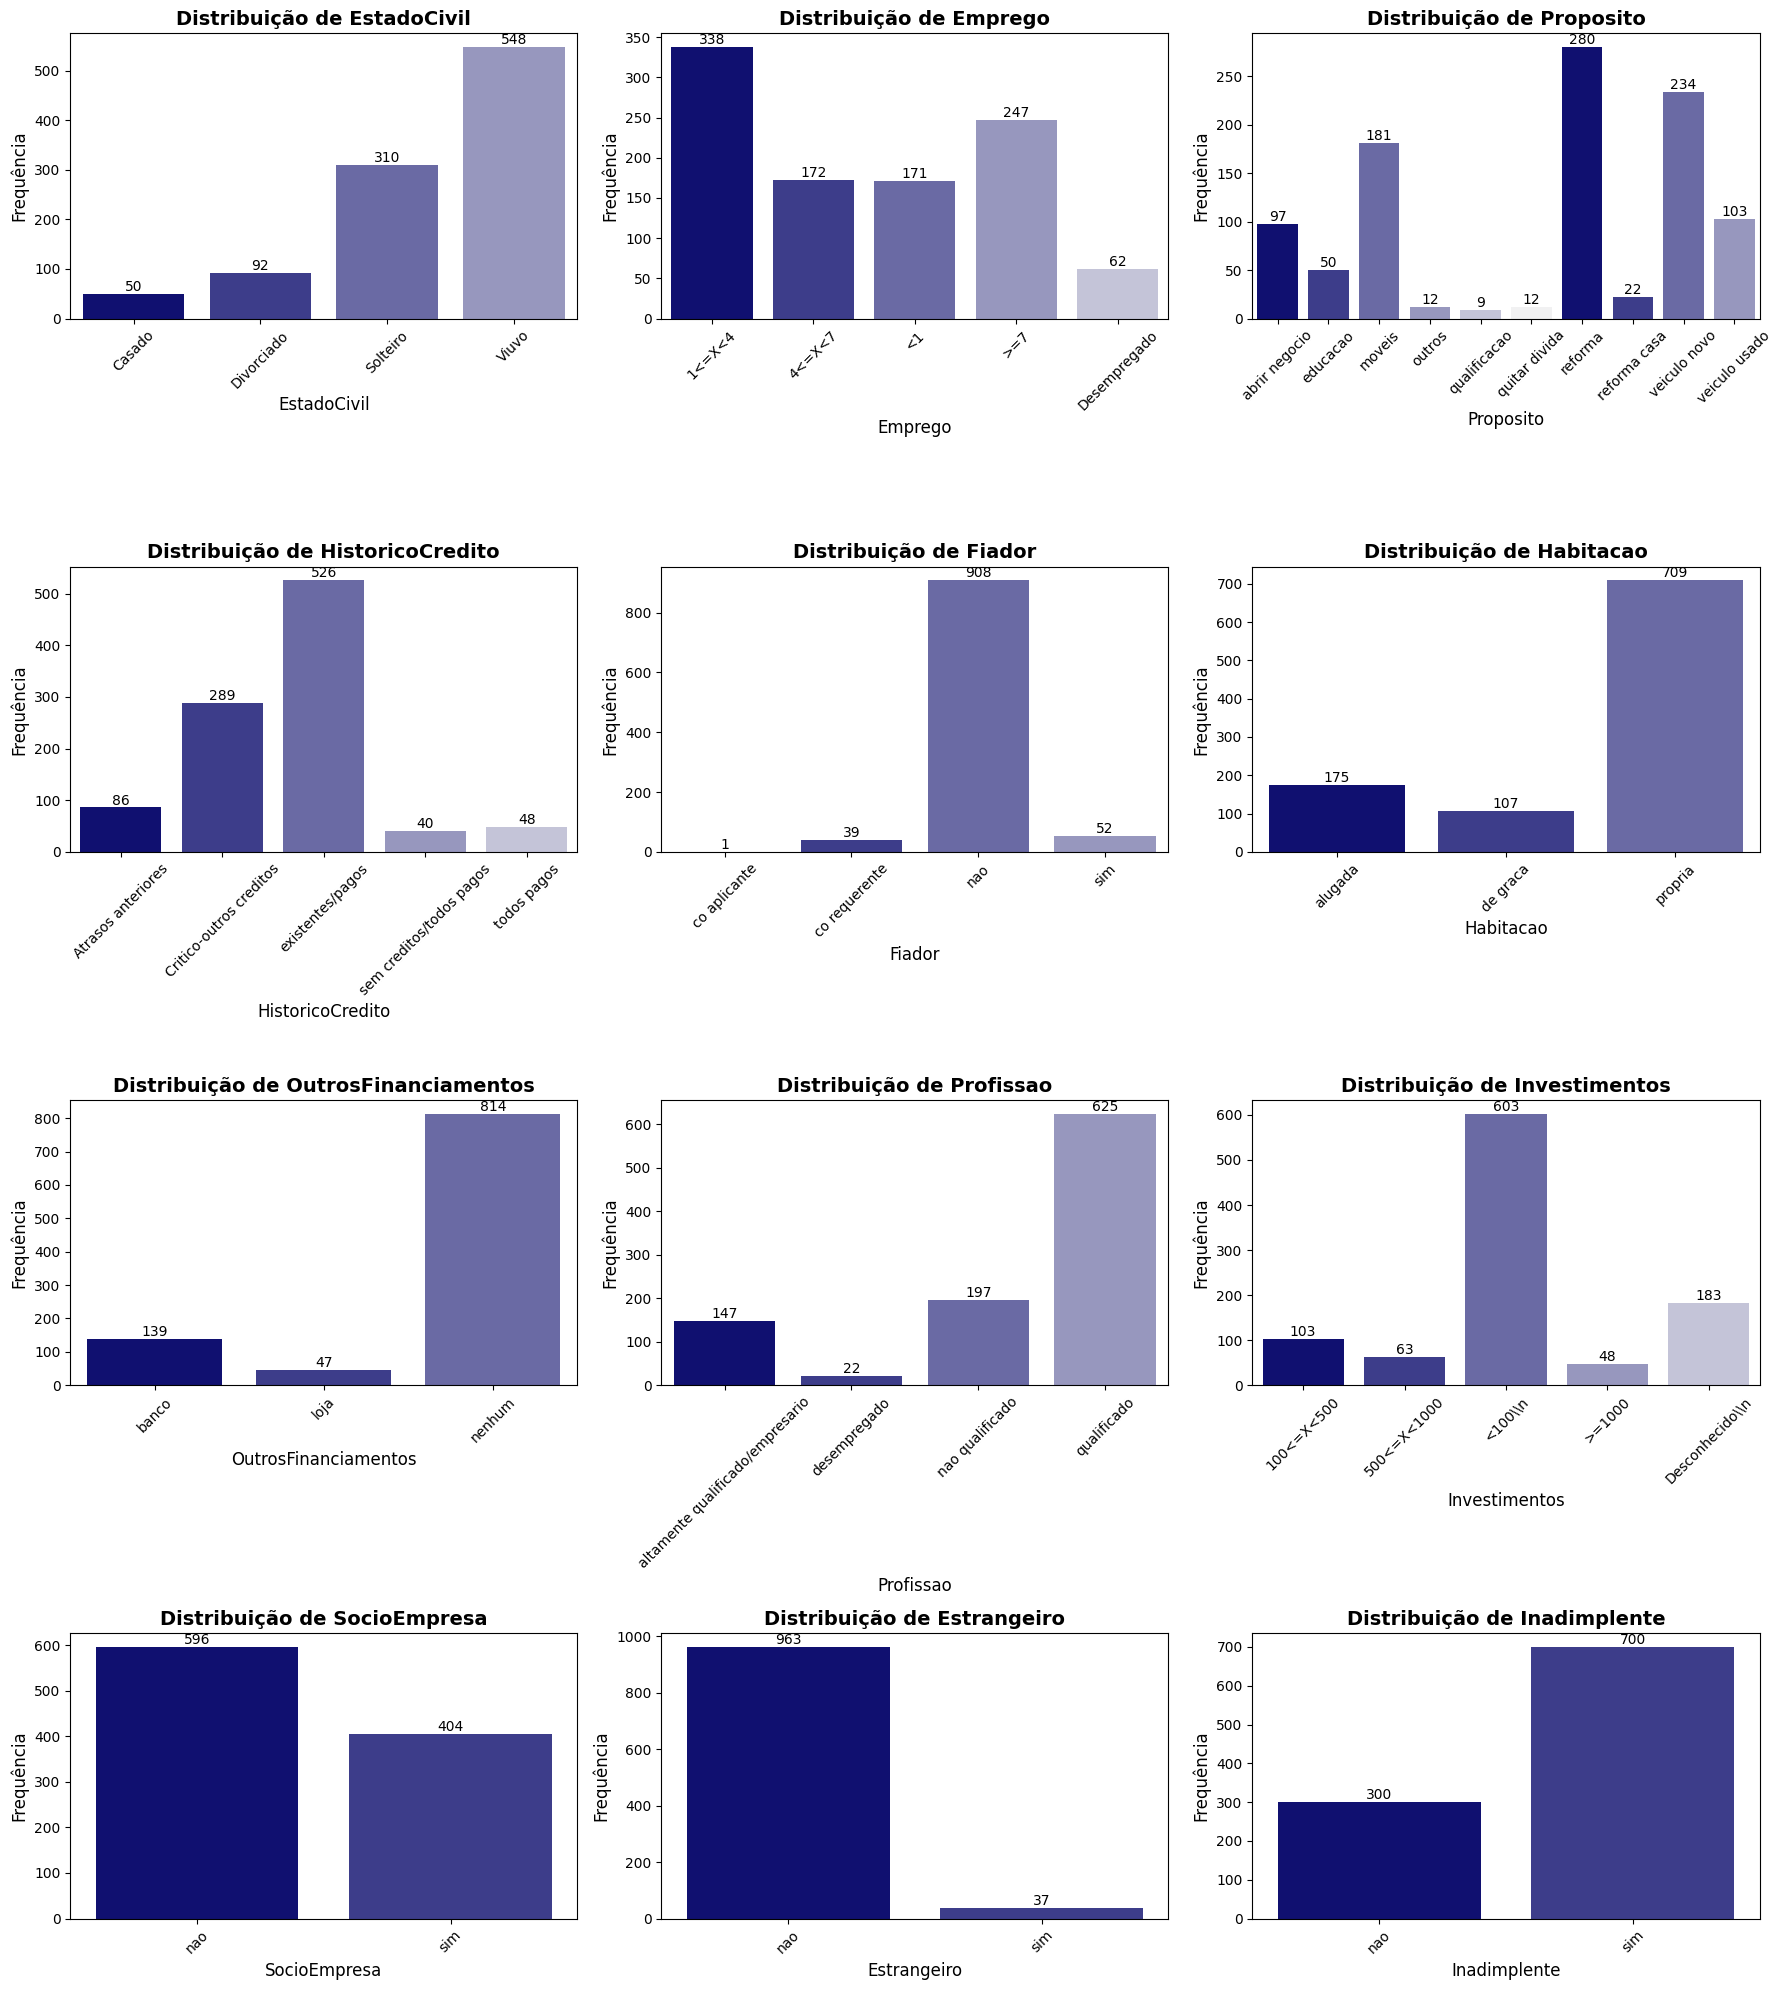

In [706]:
# Plot de barplot associado as colunas categoricas 
column_names = ['EstadoCivil', 'Emprego', 'Proposito', 'HistoricoCredito', 'Fiador', 
                'Habitacao', 'OutrosFinanciamentos', 'Profissao', 'Investimentos','SocioEmpresa', 'Estrangeiro', 'Inadimplente']

my_barplot(df_credito, column_names) # type: ignore


In [707]:
# Buscar por NAs
# Selecionar apenas as colunas categóricas
categorical_columns = df_credito.select_dtypes(include=['object', 'category'])

# Contar valores faltantes apenas nas colunas categóricas
missing_values_categorical = categorical_columns.isnull().sum()

# Filtrar para mostrar apenas colunas com valores faltantes
missing_values_categorical = missing_values_categorical[missing_values_categorical > 0]

print(missing_values_categorical)

HistoricoCredito    11
Emprego             10
Habitacao            9
Profissao            9
dtype: int64


Dados Numéricos

In [708]:
# Coluna Duracao
df_credito['Duracao'].describe()

count    1000.000000
mean       20.903000
std        12.058814
min         4.000000
25%        12.000000
50%        18.000000
75%        24.000000
max        72.000000
Name: Duracao, dtype: float64

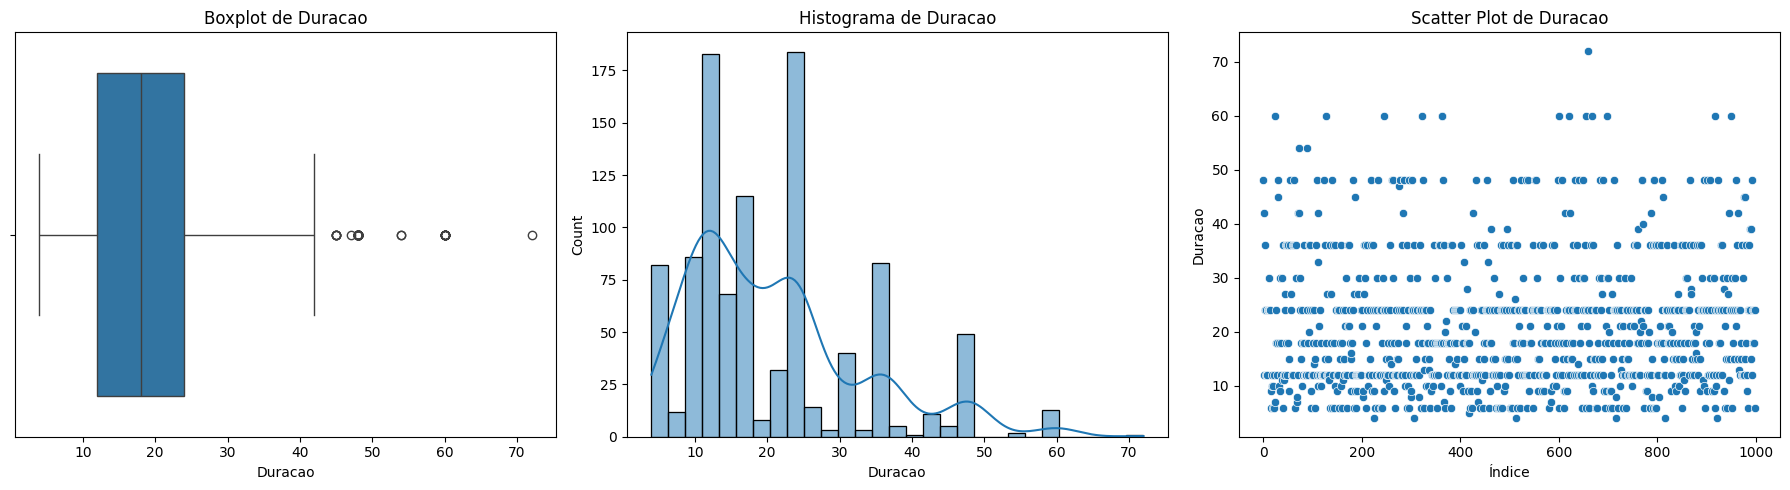

In [709]:
# Graficos
my_numerical_graphics(df_credito, 'Duracao')

In [710]:
# Coluna Valor
df_credito['Valor'].describe()

count     1000.000000
mean      3271.258000
std       2822.736876
min        250.000000
25%       1365.500000
50%       2319.500000
75%       3972.250000
max      18424.000000
Name: Valor, dtype: float64

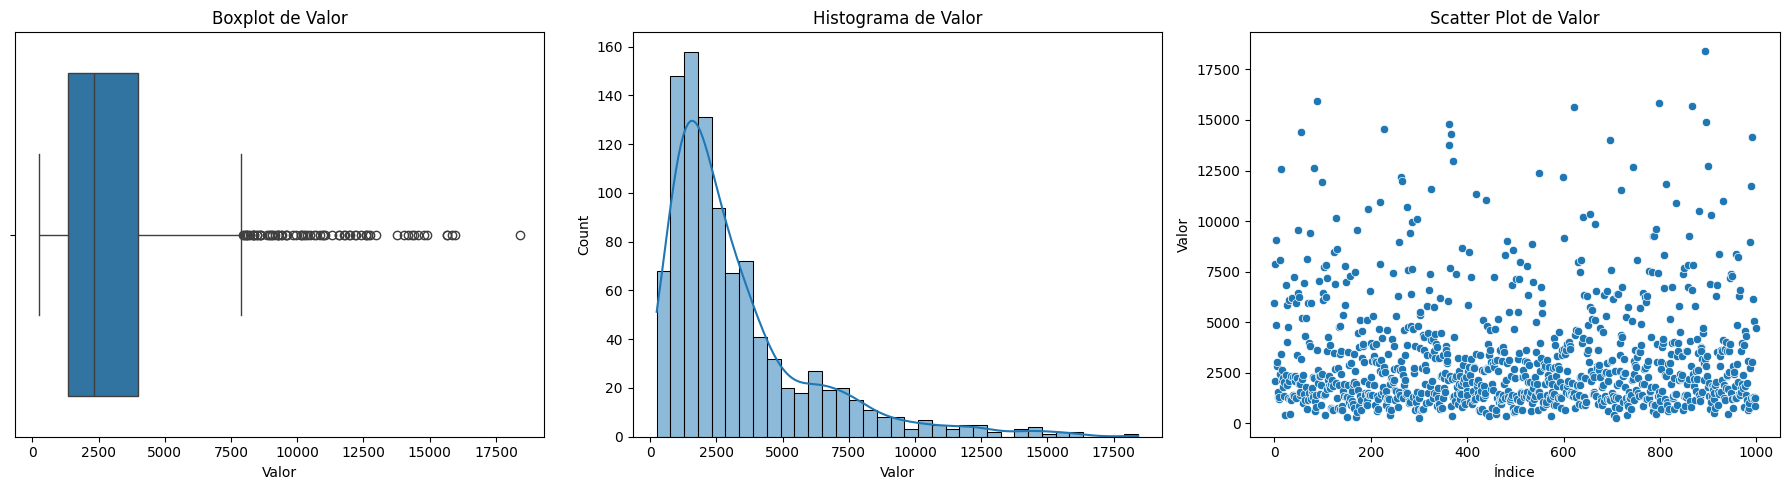

In [711]:
# Gráficos
my_numerical_graphics(df_credito,'Valor')

In [712]:
# Coluna TempoParcelamento
groupby_TempoParcelamento = df_credito.groupby(df_credito['TempoParcelamento']).size()
groupby_TempoParcelamento

TempoParcelamento
1    136
2    231
3    157
4    476
dtype: int64

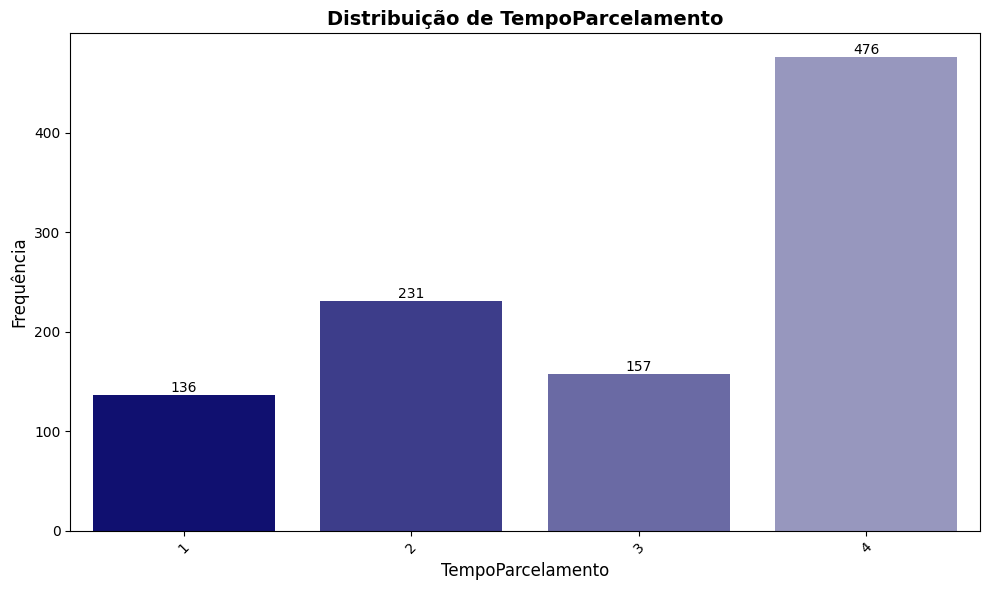

In [713]:
# Gráficos
my_barplot_single(df_credito, 'TempoParcelamento')

In [714]:
# Coluna ResidenciaDesde
groupby_ResidenciaDesde = df_credito.groupby(df_credito['ResidenciaDesde']).size()
groupby_ResidenciaDesde

ResidenciaDesde
1.0    129
2.0    308
3.0    147
4.0    409
dtype: int64

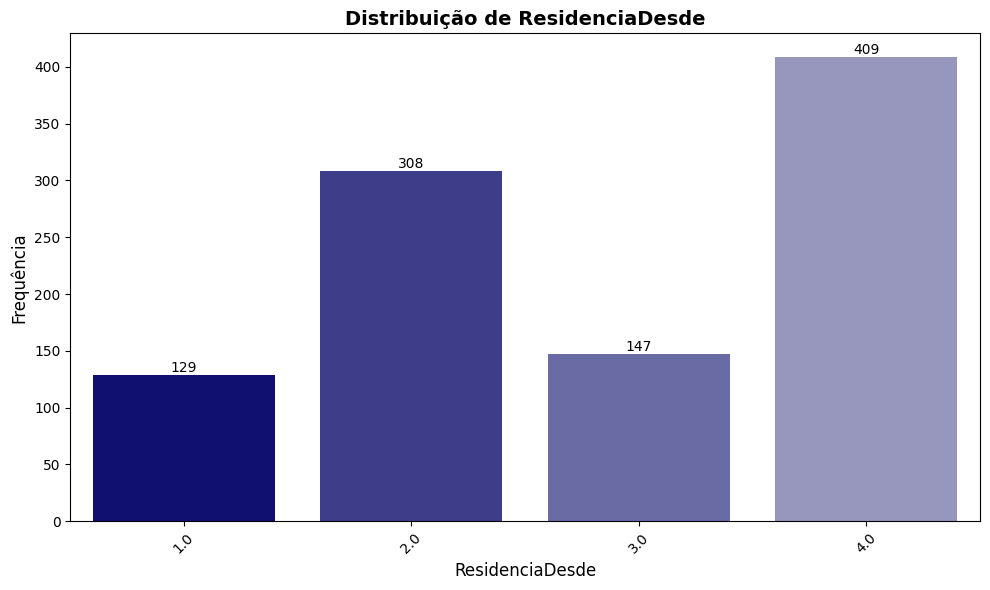

In [715]:
# Gráficos
my_barplot_single(df_credito, 'ResidenciaDesde')

In [716]:
# Coluna Idade
df_credito['Idade'].describe()

count    1000.000000
mean       35.546000
std        11.375469
min        19.000000
25%        27.000000
50%        33.000000
75%        42.000000
max        75.000000
Name: Idade, dtype: float64

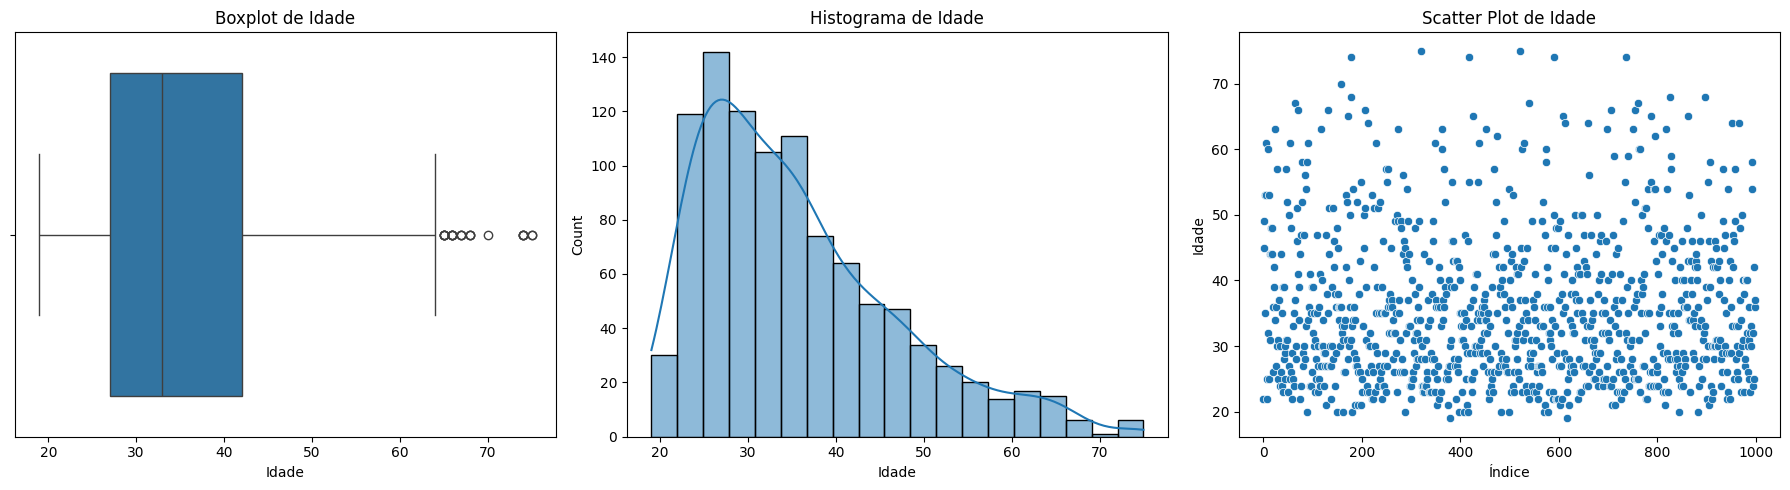

In [717]:
# Gráficos
my_numerical_graphics(df_credito, 'Idade')

In [718]:
# Coluna EmprestimoExistente
df_credito['EmprestimoExistente'].describe()

count    1000.000000
mean        1.407000
std         0.577654
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max         4.000000
Name: EmprestimoExistente, dtype: float64

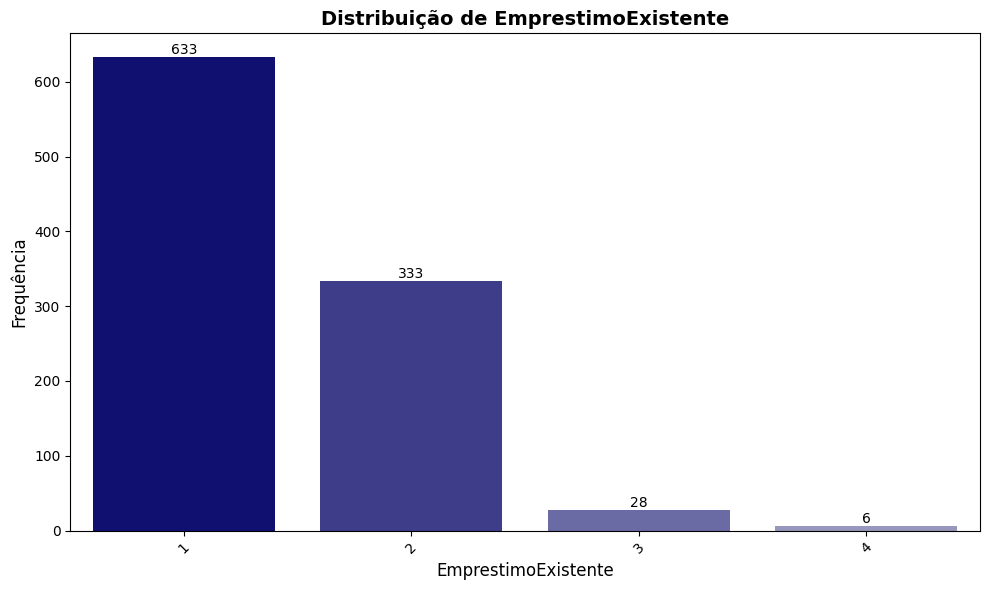

In [719]:
my_barplot_single(df_credito, 'EmprestimoExistente')

In [720]:
# Coluna Dependente
df_credito['Dependentes'].describe()

count    1000.000000
mean        1.155000
std         0.362086
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         2.000000
Name: Dependentes, dtype: float64

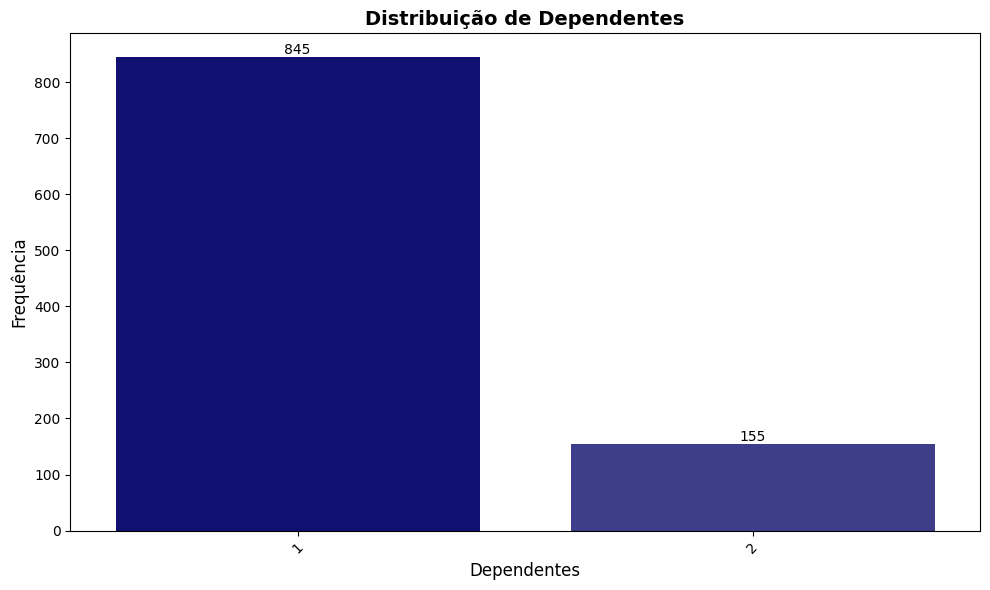

In [721]:
# Gráficos
my_barplot_single(df_credito, 'Dependentes')

In [722]:
# Buscar por NAs
# Selecionar apenas as colunas numéricas
numerical_columns = df_credito.select_dtypes(include=['number'])

# Contar valores faltantes apenas nas colunas numéricas
missing_values_numerical = numerical_columns.isnull().sum()

# Filtrar para mostrar apenas colunas com valores faltantes
missing_values_numerical = missing_values_numerical[missing_values_numerical > 0]

print(missing_values_numerical)

ResidenciaDesde    7
dtype: int64


# Limpeza e Tratamento dos Dados

Dados Categóricos

In [723]:
# Coluna Fiador 
# Trocando dado co aplicador pela moda
df_credito.loc[df_credito['Fiador'] == 'co aplicante', 'Fiador'] = 'nao'

In [724]:
# Análisando novo dominio dos dados
df_credito.groupby(df_credito['Fiador']).size()

Fiador
co requerente     39
nao              909
sim               52
dtype: int64

In [725]:
# Substituindo NAs pelas respectivas modas nas colunas ('HistoricoCredito', 'Emprego','Habitacao', 'Profissao')
categorical_NAs = ['HistoricoCredito', 'Emprego', 'Habitacao', 'Profissao']

for column in categorical_NAs:
  mode = df_credito[column].mode()[0]
  df_credito[column] = df_credito[column].fillna(mode)

Dados Numéricos

In [726]:
# Substituindo valores NAs pela mediana na coluna 'ResidenciaDesde'
df_credito['ResidenciaDesde'] = df_credito['ResidenciaDesde'].fillna(df_credito['ResidenciaDesde'].median())

In [727]:
# Verificando valores NAs
df_credito.isnull().sum()

IdCredito               0
Duracao                 0
HistoricoCredito        0
Proposito               0
Valor                   0
Investimentos           0
Emprego                 0
TempoParcelamento       0
EstadoCivil             0
Fiador                  0
ResidenciaDesde         0
Idade                   0
OutrosFinanciamentos    0
Habitacao               0
EmprestimoExistente     0
Profissao               0
Dependentes             0
SocioEmpresa            0
Estrangeiro             0
Inadimplente            0
dtype: int64

# Preparativos para o modelo

In [728]:
# Aplicar o Label Encoder para transformar as colunas categoricas em numéricas
categorical_columns = list(df_credito.select_dtypes(include=['object', 'category']))

for column in categorical_columns:
  label_encoder = LabelEncoder()
  df_credito[column] = label_encoder.fit_transform(df_credito[column])

In [729]:
# Verificando a transformação
df_credito.head(5)

,IdCredito,Duracao,HistoricoCredito,Proposito,Valor,Investimentos,Emprego,TempoParcelamento,EstadoCivil,Fiador,ResidenciaDesde,Idade,OutrosFinanciamentos,Habitacao,EmprestimoExistente,Profissao,Dependentes,SocioEmpresa,Estrangeiro,Inadimplente
0,2,48,2,6,5951,2,0,2,2,1,2.0,22,2,2,1,3,1,0,0,0
1,3,12,1,1,2096,2,1,2,3,1,3.0,49,2,2,1,2,2,0,0,1
2,4,42,2,2,7882,2,1,2,3,2,4.0,45,2,1,1,3,2,0,0,1
3,5,24,0,8,4870,2,0,3,3,1,4.0,53,2,1,2,3,2,0,0,0
4,6,36,2,1,9055,4,0,2,3,1,4.0,35,2,1,1,2,2,1,0,1


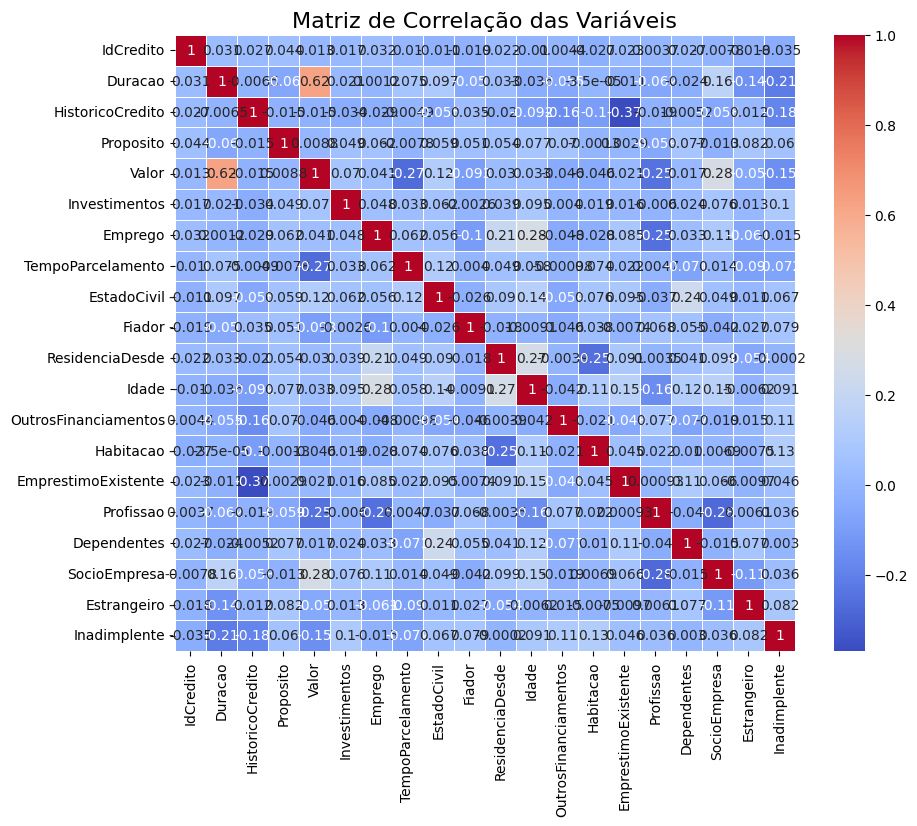

In [730]:
# Gráficod e correlação entre as variaveis
my_heatmap(df_credito)

In [731]:
# Removendo a coluna 'Duracao', por ter uma alta correlação com a coluna 'Valor'
# Removendo a coluna 'idCredito' por ser uma coluna de id 
df_credito = df_credito.drop(['IdCredito','Duracao'], axis=1)

In [732]:
# Verificando dataframe final
df_credito.head(5)

,HistoricoCredito,Proposito,Valor,Investimentos,Emprego,TempoParcelamento,EstadoCivil,Fiador,ResidenciaDesde,Idade,OutrosFinanciamentos,Habitacao,EmprestimoExistente,Profissao,Dependentes,SocioEmpresa,Estrangeiro,Inadimplente
0,2,6,5951,2,0,2,2,1,2.0,22,2,2,1,3,1,0,0,0
1,1,1,2096,2,1,2,3,1,3.0,49,2,2,1,2,2,0,0,1
2,2,2,7882,2,1,2,3,2,4.0,45,2,1,1,3,2,0,0,1
3,0,8,4870,2,0,3,3,1,4.0,53,2,1,2,3,2,0,0,0
4,2,1,9055,4,0,2,3,1,4.0,35,2,1,1,2,2,1,0,1


# Criação da Rede Neural Artificial

In [733]:
# Separação dos variaveis independentes, e da varíavel alvo
X = df_credito.iloc[:,:17].values
y = df_credito.iloc[:,17].values

In [734]:
# # Separação de 20% dos dados para teste e 80% para treino
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)
print(len(X_train), len(y_train), len(X_test), len(y_test))

800 800 200 200


In [735]:
# Criação da estrutura da rede neural
classifier = Sequential()
classifier.add(Dense(units = 9, kernel_initializer= 'uniform', activation= 'relu', input_dim = 17))
classifier.add(Dropout(0.2))  # Regularização
classifier.add(Dense(units = 9, kernel_initializer= 'uniform', activation= 'relu'))
classifier.add(Dropout(0.2))  # Regularização
classifier.add(Dense(units = 1, kernel_initializer= 'uniform', activation= 'sigmoid'))
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = [f1_score])

In [736]:
# Visualização da estrutura da rede neural
classifier.summary()

Model: "sequential_30"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_86 (Dense)                │ (None, 9)              │           162 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_52 (Dropout)            │ (None, 9)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_87 (Dense)                │ (None, 9)              │            90 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_53 (Dropout)            │ (None, 9)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_88 (Dense)                │ (None, 1)              │            10 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 262 (1.02 KB)

 Trainable params: 262 (1.02 KB)

 Non-trainable params: 0 (0.00 B)

In [737]:
# Treinamento do modelo
classifier.fit(X_train, y_train, epochs = 500, batch_size = 3, 
               validation_data = (X_test, y_test))

Epoch 1/500


267/267 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - f1_score: 2.2379 - loss: 0.7015 - val_f1_score: 2.4343 - val_loss: 0.6480
Epoch 2/500
267/267 ━━━━━━━━━━━━━━━━━━━━ 0s 976us/step - f1_score: 2.3940 - loss: 0.6504 - val_f1_score: 2.4343 - val_loss: 0.6349
Epoch 3/500
267/267 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - f1_score: 2.3451 - loss: 0.6461 - val_f1_score: 2.4343 - val_loss: 0.6173
Epoch 4/500
267/267 ━━━━━━━━━━━━━━━━━━━━ 0s 946us/step - f1_score: 2.2531 - loss: 0.6571 - val_f1_score: 2.4343 - val_loss: 0.6035
Epoch 5/500
267/267 ━━━━━━━━━━━━━━━━━━━━ 0s 930us/step - f1_score: 2.3202 - loss: 0.6433 - val_f1_score: 2.4343 - val_loss: 0.6051
Epoch 6/500
267/267 ━━━━━━━━━━━━━━━━━━━━ 0s 923us/step - f1_score: 2.3383 - loss: 0.6271 - val_f1_score: 2.4343 - val_loss: 0.5991
Epoch 7/500
267/267 ━━━━━━━━━━━━━━━━━━━━ 0s 901us/step - f1_score: 2.3146 - loss: 0.6272 - val_f1_score: 2.4343 - val_loss: 0.5911
Epoch 8/500
267/267 ━━━━━━━━━━━━━━━━━━━━ 0s 972us/step - f1_score: 2.3708 - loss: 0.6190 - val_f1_s

In [738]:
# Como é um problema com três saídas, precisamos buscar a posição que possui o maior valor (são retornados 3 valores)
y_teste_matrix = [np.argmax(t) for t in y_test]
y_previsao_matrix = [np.argmax(t) for t in X]

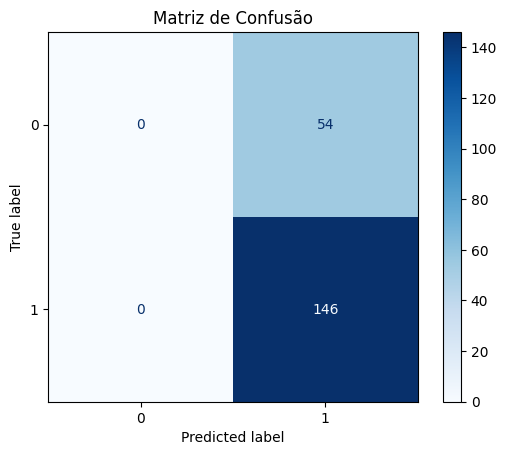

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

y_predict_binary = [1 if p >= 0.5 else 0 for p in y_predict]

if len(y_test.shape) > 1 and y_test.shape[1] > 1:
    y_test_binary = [np.argmax(t) for t in y_test]
else:
    y_test_binary = y_test

matriz_confusao = confusion_matrix(y_test_binary, y_predict_binary)

disp = ConfusionMatrixDisplay(confusion_matrix=matriz_confusao)
disp.plot(cmap=plt.cm.Blues)
plt.title("Matriz de Confusão")
plt.show()
